<a href="https://colab.research.google.com/github/gnonname/Machine-Learning/blob/main/Analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


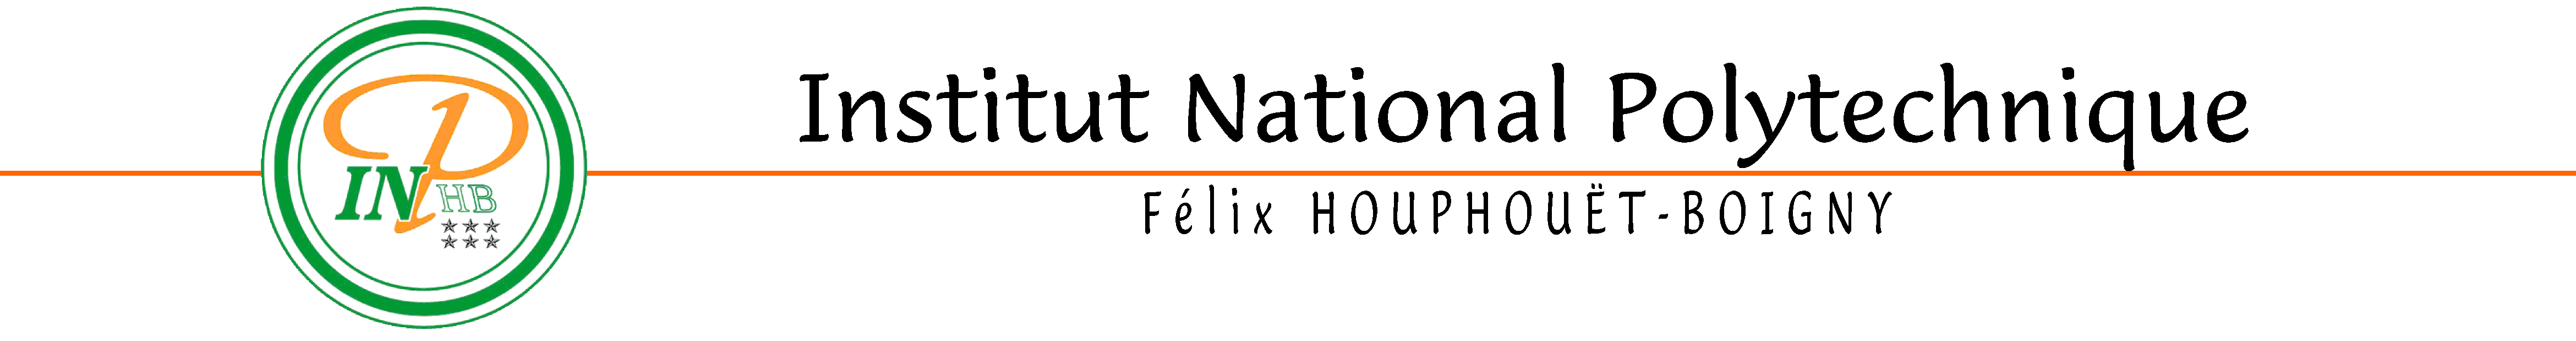
---

<h1 align=center>Master Data Science - Big Data</h1>
<h2 align=center>Web Scraping</h2>

---

<h3 align=center>Projet de fin d’études</h3>

--- Réalisé par:

TOLIDJI GNONNAME CEDARTA DONOU                                          

KAMAGNI CHARLES KONE

ADJOUA RAISSA CARINE YAO



<h4 align=right>--- Professeurs:</h4>
<h6 align=right>KOUSSAN BRICE</h6>
<h6 align=right>TAPE FABIEN</h6>




<h1>  <center> E-REPUTATION GROUPE PUBLIC FACEBOOK</center> </h1>

## **Problème**

Mettre en œuvre un outil de collecte des données de groupes publics FACEBOOK (au moins 03) à forte affluence parlant des termes (banque, internet, TELECOM, Mobile money, assurance, …).
Pour résoudre le problème :

Eléments à collecter :
<h3 align=center>Les étapes dans de deploiement de notre solution</h3>

**Nous colleterons** ⁉

1.  Posts/Publications
2.  Commentaires
3.  Réactions (Nombre de Like, Commentaire, Partage, …)

**Fonctionnalités** ⁉ :
   1. Top 10 des posts les plus likés, partagés, commentés, …
   2. Top 10 des influenceurs 
   3. Top 10 des Buzz Words
   4. La concurrence,
   5. Les publications les plus négatives,
   6. Et bien d’autres …




## Analyses des textes 

 Dans cette derniere partie il s'agira d'analyser les commentaires scraper sur les différentes groupes public facebook en se servant du text mining en python.
 Nous avons par la suite créés deux fonctions qui permetra de réalisé les wordsclouds des bases et en suite des representations graphique des mots dans un plan de deux axes.
 
 NB: Nous tenons à rappeler que notre navigateur pour les sraping est chrome avec un geccor spécifier à sa version.


### Libraries 

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
# import of packages
import re
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import string
import collections
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 KB 297.2 kB/s eta 0:00:000:00:01m eta 0:00:01


In [ ]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 638.1 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 821.7 kB/s eta 0:00:001m925.9 kB/s eta 0:00:01


In [ ]:
import nltk
print(nltk.__version__)

3.7


In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 910.1 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 843.3 kB/s eta 0:00:00m eta 0:00:010:00:02


In [ ]:
import gensim
print(gensim.__version__)

4.1.2


Nous Travaillons avec les versions 3.7 et 4.1.2 de nltk et gensium

In [ ]:
import os

In [ ]:
os.getcwd()

'/home/cdata/Documents/M2/WebScraping/Web_Scraping_Dynamique'

In [ ]:
os.chdir("/home/cdata/Documents/M2/EXAMEN")

In [ ]:
os.getcwd()

'/home/cdata/Documents/M2/EXAMEN'

### Importation des données

Il est essentiel de notidier que les bases de donné qui font ogjet de ce present analyse sont au nombre de cinq(5) .Renseignant des informations scraper qui suivent: les Informateurs d'Abidjan.net, Les désabusés, Un consommateur avertir en vos deux, Avis des consommateurs de cote d'ivoire, Espace fonctionnaire de cote d'ivoire.

Dans la suite de ce present script nous avons testés nos codes avec deux bases et implementé les cinq bases dans une application qui sera join aux dossiers du projet.

In [ ]:
import pandas as pd

In [ ]:
df1=pd.read_csv("postsdata_reacts.csv",on_bad_lines='skip',sep='@')
df2=pd.read_csv("avis_defenseConsommateur.csv",on_bad_lines='skip',sep='@')

In [ ]:
df1

,id_post,post_link,date_time_post,date_post,hours_post,text_pub,htag_pub_desc,htag_link,image_desc,image_link,nbre_jaime,nbre_commentaire,nbre_partage,nbre_jadore,nbre_wouah,nbre_haha,nbre_grrr,nbre_triste,nbre_autres_reactions
0,5025668197525149,https://www.facebook.com/groups/10358793898374...,2022-02-22 18:58:36,2022-02-22,18:58:36,"Selon votre expertise, conseillez-moi une banq...",NaN,NaN,NaN,NaN,4,9,0,0,0,0,0,0,0
1,5020858981339404,https://www.facebook.com/groups/10358793898374...,2022-02-22 07:38:00,2022-02-22,07:38:00,*La vie est devenue chère hooo...\n*Il ne vont...,NaN,NaN,NaN,NaN,26,7,10,0,0,0,0,0,0
2,3030988583659797,https://www.facebook.com/groups/10358793898374...,2020-05-09 06:53:00,2020-05-09,06:53:00,Prêt bancaire : À quel taux d'intérêt faut-il ...,NaN,NaN,NaN,NaN,215,89,180,0,0,0,0,0,0
3,4758233470935291,https://www.facebook.com/groups/10358793898374...,2021-12-13 11:57:00,2021-12-13,11:57:00,La différence se justifie au fait que le conso...,NaN,NaN,"|Peut être une image de personne, enfant, arbr...",|https://z-m-scontent.fabj2-1.fna.fbcdn.net/v/...,3,2,0,0,0,0,0,0,0
4,5003483656410270,https://www.facebook.com/groups/10358793898374...,2022-02-16 05:21:00,2022-02-16,05:21:00,Pour un prêt à la banque d'un montant de 3.800...,NaN,NaN,NaN,NaN,4,11,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,3997971303628182,https://www.facebook.com/groups/10358793898374...,2021-04-06 12:31:00,2021-04-06,12:31:00,Le risque numérique est là et les organisation...,|,https://m.facebook.com/hashtag/restonsconcentr...,|,|,0,0,0,0,0,0,0,0,0
57,3974422899316356,https://www.facebook.com/groups/10358793898374...,2021-03-29 06:55:00,2021-03-29,06:55:00,#Les_Chroniques_de_BDK,Les_Chroniques_de_BDK,https://m.facebook.com/hashtag/les_chroniques_...,|,|,3,0,0,0,0,0,0,0,0
58,3950786891679957,https://www.facebook.com/groups/10358793898374...,2021-03-22 08:32:00,2021-03-22,08:32:00,J'ai un vrais problèmes avec les banques #SIB ...,SIB|BNI|SIB|BNI|,https://m.facebook.com/hashtag/sib?refid=18&_f...,|,|,0,0,0,0,0,0,0,0,0
59,3950745335017446,https://www.facebook.com/groups/10358793898374...,2021-03-22 07:48:00,2021-03-22,07:48:00,Ma réponse est oui : invente ou innove un prod...,NaN,NaN,|,|,3,0,0,0,0,0,0,0,0


In [ ]:
df2.head(10)

,id_post,post_link,date_time_post,date_post,hours_post,text_pub,htag_pub_desc,htag_link,image_desc,image_link,nbre_jaime,nbre_commentaire,nbre_partage,nbre_jadore,nbre_wouah,nbre_haha,nbre_grrr,nbre_triste,nbre_autres_reactions
0,7081789711895143,https://www.facebook.com/groups/consommateurs....,2022-02-22 18:35:13,2022-02-22,18:35:13,#INFO\n#ANARE_CI,INFO|ANARE_CI,https://m.facebook.com/hashtag/info?refid=18&_...,|Aucune description de photo disponible.,|https://z-m-scontent.fabj2-1.fna.fbcdn.net/v/...,1,0,3,0,0,0,0,0,0
1,7075158712558243,https://www.facebook.com/groups/consommateurs....,2022-02-22 12:30:00,2022-02-22,12:30:00,Femme en colère à cause de la cherté,NaN,NaN,|,|,8,1,5,0,0,0,0,0,0
2,7065483733525741,https://www.facebook.com/groups/consommateurs....,2022-02-19 16:39:00,2022-02-19,16:39:00,"ON N'A PAS DONNÉ NOTRE VOIX À LA PAUVRETÉ,\nMA...",NaN,NaN,|Peut être une image de texte qui dit ’SAHO 25...,|https://z-m-scontent.fabj2-1.fna.fbcdn.net/v/...,18,15,19,0,0,0,0,0,0
3,7073525706054877,https://www.facebook.com/groups/consommateurs....,2022-02-22 08:49:00,2022-02-22,08:49:00,Monsieur le Directeur général de la BNI dites ...,NaN,NaN,NaN,NaN,5,1,0,0,0,0,0,0,0
4,7079620442112070,https://www.facebook.com/groups/consommateurs....,2022-02-22 08:35:13,2022-02-22,08:35:13,🇨🇮🇨🇮\n⛔ STOP À LA MALTRAITANCE HUMAINE.\n⛔ STO...,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0
5,7072133429527438,https://www.facebook.com/groups/consommateurs....,2022-02-20 22:15:00,2022-02-20,22:15:00,Moi je vais m'adresser au Pr nous population n...,NaN,NaN,NaN,NaN,3,3,0,0,0,0,0,0,0
6,7069364709804310,https://www.facebook.com/groups/consommateurs....,2022-02-20 09:01:00,2022-02-20,09:01:00,"CIE NIANGON,\nAUCUN RESPECT POUR LES URGENCES ...",NaN,NaN,|Peut être une image de 1 personne et texte qu...,|https://z-m-scontent.fabj2-1.fna.fbcdn.net/v/...,0,1,0,0,0,0,0,0,0
7,7070091316398316,https://www.facebook.com/groups/consommateurs....,2022-02-20 13:09:00,2022-02-20,13:09:00,"Les influenceurs +225 là, c'est maintenant vou...",NaN,NaN,NaN,NaN,48,12,8,0,0,0,0,0,0
8,7074865925920855,https://www.facebook.com/groups/consommateurs....,2022-02-22 12:30:00,2022-02-22,12:30:00,C'est pas génial ça 👌👌👌,||,https://m.facebook.com/hashtag/onmoderniseladm...,"|Fabrice Djaha, profile picturePeut être une i...",|https://z-m-scontent.fabj2-1.fna.fbcdn.net/v/...,0,0,0,0,0,0,0,0,0
9,5428587103836340,https://www.facebook.com/groups/consommateurs....,2022-02-22 09:59:00,2022-02-22,09:59:00,Vraiment un bon changement dans l'administrati...,||,https://m.facebook.com/hashtag/onmoderniseladm...,|Peut être une image de 1 personne et texte qu...,|https://z-m-scontent.fabj2-1.fna.fbcdn.net/v/...,0,0,0,0,0,0,0,0,0


Notre variables d'analyse est le la variables "text_pub" qui represente les publicité dans les groupes scraper.

<h3 align=center>---Debut Analyse:</h3>

### Nettoyage des textes

In [ ]:
df1["text_pub"].isnull().sum()

0

In [ ]:
# recuperons sous forma liste
corpus = df1["text_pub"].tolist()

In [ ]:
corpus

['Selon votre expertise, conseillez-moi une banque qui est réputée pour être sérieuse et qui prends soin des fonctionnaires',
 '*La vie est devenue chère hooo...\n*Il ne vont pas suspendre la construction des infrastructures à cause de ton ventre hooo...\n*Faut pas compter sur salaire seulement pour te nourrir hooo....\n*Faut créer un petit projet pour arrondir tes revenus hooo...\n*Faut investir dans un petit champs hooo...\n*Faut pas prendre prêt bancaire pour mettre dans… Plus',
 "Prêt bancaire : À quel taux d'intérêt faut-il emprunter et Comment calculer ses mensualités ?\nTrès souvent après avoir contracter un prêt bancaire ou crédit à la consommation, on entend certains se plaindre : la banque m'a volé !!! Ainsi, avant de se mettre sous prêt, il est important de connaître le mécanisme par lequel la banque vous facture le… Plus",
 "La différence se justifie au fait que le consommateur ivoirien est le plus irrationnel au monde... D'autres banques sont à 8% avec 1200f comme agio mai

In [ ]:
# passer en miniscul
corpus=[element.lower() for element in corpus]

In [ ]:
print(corpus)

['selon votre expertise, conseillez-moi une banque qui est réputée pour être sérieuse et qui prends soin des fonctionnaires', '*la vie est devenue chère hooo...\n*il ne vont pas suspendre la construction des infrastructures à cause de ton ventre hooo...\n*faut pas compter sur salaire seulement pour te nourrir hooo....\n*faut créer un petit projet pour arrondir tes revenus hooo...\n*faut investir dans un petit champs hooo...\n*faut pas prendre prêt bancaire pour mettre dans… plus', "prêt bancaire : à quel taux d'intérêt faut-il emprunter et comment calculer ses mensualités ?\ntrès souvent après avoir contracter un prêt bancaire ou crédit à la consommation, on entend certains se plaindre : la banque m'a volé !!! ainsi, avant de se mettre sous prêt, il est important de connaître le mécanisme par lequel la banque vous facture le… plus", "la différence se justifie au fait que le consommateur ivoirien est le plus irrationnel au monde... d'autres banques sont à 8% avec 1200f comme agio mais i

In [ ]:
# liste des ponctuations 
import string
ponc = list(string.punctuation)
print(ponc)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [ ]:
# retrait des ponctuations 
corpus=["".join([char for char in list(doc) if not (char in ponc)]) for doc in corpus]

In [ ]:
corpus[1]# Vérification

'la vie est devenue chère hooo\nil ne vont pas suspendre la construction des infrastructures à cause de ton ventre hooo\nfaut pas compter sur salaire seulement pour te nourrir hooo\nfaut créer un petit projet pour arrondir tes revenus hooo\nfaut investir dans un petit champs hooo\nfaut pas prendre prêt bancaire pour mettre dans… plus'

In [ ]:
#cleaning function 
def nettoyeur(text):
    """Cette fonction se charge de nettoyer les données"""
    text = text.lower()
    text = re.sub(r'[àáâãäå]', 'a', text)
    text = re.sub(r'[èéêë]', 'e', text)
    text = re.sub(r'[ìíîï]', 'i', text)
    text = re.sub(r'[òóôõö]', 'o', text)
    text = re.sub(r'[ùúûü]', 'u', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+«»', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df_clean = []
for text in corpus:
    text = [nettoyeur(x) for x in text]
    df_clean.append(text)

In [ ]:
#final text, grouping all comments
df_text = [''.join(text) for text in df_clean]
final_text = " ".join(df_text)
final_text

'selon votre expertise conseillezmoi une banque qui est reputee pour etre serieuse et qui prends soin des fonctionnaires la vie est devenue chere hoooil ne vont pas suspendre la construction des infrastructures a cause de ton ventre hooofaut pas compter sur salaire seulement pour te nourrir hooofaut creer un petit projet pour arrondir tes revenus hooofaut investir dans un petit champs hooofaut pas prendre pret bancaire pour mettre dans… plus pret bancaire  a quel taux dinteret fautil emprunter et comment calculer ses mensualites tres souvent apres avoir contracter un pret bancaire ou credit a la consommation on entend certains se plaindre  la banque ma vole  ainsi avant de se mettre sous pret il est important de connaitre le mecanisme par lequel la banque vous facture le… plus la difference se justifie au fait que le consommateur ivoirien est le plus irrationnel au monde dautres banques sont a  avec f comme agio mais ils preferent sagglutiner dans les banques françaises… plus pour un p

In [ ]:
#stopwords define
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')

#define of newstopwords
newStopWords = ['efficacité👍','🐿',"👍","⛔ps","🙏🇨🇮","🇨🇮","🙄","😕","🐘","🤔","👍",'🙏','🇨🇮','🏡','⛔','…','j’ai','c’est','·','.','’','','»','Le',',','«','a','–','(',')','La']

In [ ]:
stopwords = set(stopwords.words('french') + newStopWords)

In [ ]:
#update of stopwords
stopwords.update(['cest','mars','meme','cette','ça','autres','d’un','fevr','aout','cas','fait','ete','dec','mercredi','nov','oct','juil','plus','juin','mai','d’ivoire','sept','cote','a'])

### Vue des des mots dans les commentaires

In [ ]:
def CommonWord(df):
    # recuperons sous forma liste
    corpus = df["text_pub"].tolist()
    # passer en miniscul
    corpus=[element.lower() for element in corpus]
    # liste des ponctuations 
    import string
    ponc = list(string.punctuation)
    #print(ponc)
    # retrait des ponctuations 
    corpus=["".join([char for char in list(doc) if not (char in ponc)]) for doc in corpus]
    #cleaning function 
    df_clean = []
    for text in corpus:
        text = [nettoyeur(x) for x in text]
        df_clean.append(text)
    #final text, grouping all comments
    df_text = [''.join(text) for text in df_clean]
    final_text = " ".join(df_text)
    from collections import Counter
    import seaborn as sns
    eap_list = final_text.split() 
    eap_counts = Counter(eap_list)
    eap_common_words = [word[0] for word in eap_counts.most_common(25)]
    eap_common_counts = [word[1] for word in eap_counts.most_common(25)]

    plt.style.use('dark_background')
    plt.figure(figsize=(15, 12))

    sns.barplot(x=eap_common_words, y=eap_common_counts)
    plt.title('Les mots les plus communs dans les commentaires');

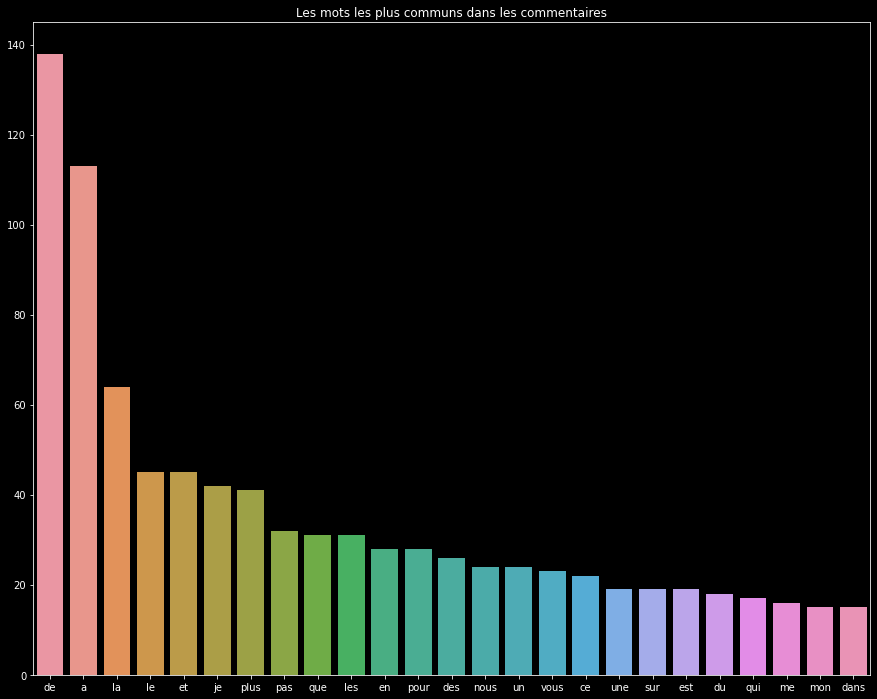

In [ ]:
CommonWord(df2)

Pas très instructif…. On a beaucoup de mots “commun”, comme “le”, “de”,"les"  qui ne nous intéressent pas. On va donc devoir nettoyer les textes a nouveaux.

### BuzzWord

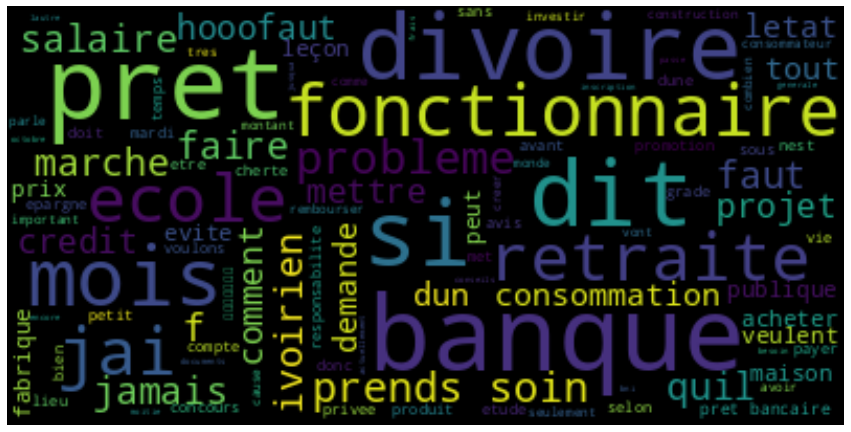

In [ ]:
#other visualization
wordcloud_df = WordCloud(stopwords=stopwords,max_font_size=50,max_words=100).generate(final_text)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud_df,interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Our buzz words 
filter_word = [word for word in final_text.split() if word not in stopwords]
counted_word = collections.Counter(filter_word)

word_count = {}

for letter, count in counted_word.most_common(10):
    word_count[letter]=count

for i,j in word_count.items():
    print("Le mot: {0} est apparu {1} fois".format(i,j))

Le mot: pret est apparu 13 fois
Le mot: divoire est apparu 9 fois
Le mot: dit est apparu 9 fois
Le mot: si est apparu 9 fois
Le mot: banque est apparu 8 fois
Le mot: mois est apparu 7 fois
Le mot: prends est apparu 6 fois
Le mot: soin est apparu 6 fois
Le mot: jai est apparu 6 fois
Le mot: retraite est apparu 6 fois


<h3 align=center>--- Analyse Profonde---</h3>

### Tokenisation

In [ ]:
import nltk
#list(STOPWORDS)nltk.download('punkt')

In [ ]:
## transformons les document en liste de liste par tokenisation
from nltk.tokenize import word_tokenize
corpus_tk=[word_tokenize(doc) for doc in corpus]

In [ ]:
#avant
print(corpus[0])
print("\n\n\n")
#apres 
print(corpus_tk[0])
print("\n\n\n")
#le tout
for i in corpus_tk:
    print(i)

selon votre expertise conseillezmoi une banque qui est réputée pour être sérieuse et qui prends soin des fonctionnaires




['selon', 'votre', 'expertise', 'conseillezmoi', 'une', 'banque', 'qui', 'est', 'réputée', 'pour', 'être', 'sérieuse', 'et', 'qui', 'prends', 'soin', 'des', 'fonctionnaires']




['selon', 'votre', 'expertise', 'conseillezmoi', 'une', 'banque', 'qui', 'est', 'réputée', 'pour', 'être', 'sérieuse', 'et', 'qui', 'prends', 'soin', 'des', 'fonctionnaires']
['la', 'vie', 'est', 'devenue', 'chère', 'hooo', 'il', 'ne', 'vont', 'pas', 'suspendre', 'la', 'construction', 'des', 'infrastructures', 'à', 'cause', 'de', 'ton', 'ventre', 'hooo', 'faut', 'pas', 'compter', 'sur', 'salaire', 'seulement', 'pour', 'te', 'nourrir', 'hooo', 'faut', 'créer', 'un', 'petit', 'projet', 'pour', 'arrondir', 'tes', 'revenus', 'hooo', 'faut', 'investir', 'dans', 'un', 'petit', 'champs', 'hooo', 'faut', 'pas', 'prendre', 'prêt', 'bancaire', 'pour', 'mettre', 'dans…', 'plus']
['prêt', 'bancaire',

In [ ]:
!pip install spacy

## Lematisation 

Pour des raisons grammaticales, les documents vont utiliser différentes formes d'un mot, telles que organiser, organiser et organiser. De plus, il existe des familles de mots liés par dérivation avec des significations similaires, telles que la démocratie, la démocratie et la démocratisation. Dans de nombreuses situations, il semble qu'il serait utile qu'une recherche sur l'un de ces mots renvoie des documents contenant un autre mot dans l'ensemble.
L'objectif à la fois de la radicalisation et de la lemmatisation est de réduire les formes flexionnelles et parfois les formes dérivées d'un mot à une forme de base commune



In [ ]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /home/cdata/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /home/cdata/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
corpus_lem = [[lem.lemmatize(mot) for mot in doc] for doc in corpus_tk]
print(corpus_lem)

[['selon', 'votre', 'expertise', 'conseillezmoi', 'une', 'banque', 'qui', 'est', 'réputée', 'pour', 'être', 'sérieuse', 'et', 'qui', 'prends', 'soin', 'de', 'fonctionnaires'], ['la', 'vie', 'est', 'devenue', 'chère', 'hooo', 'il', 'ne', 'vont', 'pa', 'suspendre', 'la', 'construction', 'de', 'infrastructure', 'à', 'cause', 'de', 'ton', 'ventre', 'hooo', 'faut', 'pa', 'compter', 'sur', 'salaire', 'seulement', 'pour', 'te', 'nourrir', 'hooo', 'faut', 'créer', 'un', 'petit', 'projet', 'pour', 'arrondir', 'te', 'revenus', 'hooo', 'faut', 'investir', 'dans', 'un', 'petit', 'champ', 'hooo', 'faut', 'pa', 'prendre', 'prêt', 'bancaire', 'pour', 'mettre', 'dans…', 'plus'], ['prêt', 'bancaire', 'à', 'quel', 'taux', 'dintérêt', 'fautil', 'emprunter', 'et', 'comment', 'calculer', 's', 'mensualités', 'très', 'souvent', 'après', 'avoir', 'contracter', 'un', 'prêt', 'bancaire', 'ou', 'crédit', 'à', 'la', 'consommation', 'on', 'entend', 'certains', 'se', 'plaindre', 'la', 'banque', 'ma', 'volé', 'ainsi

### StopWords


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/cdata/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
motsVides = stopwords.words('french')
print(motsVides)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [ ]:
# Rappelons les autres stopwords# particuliers
newStopWords

['efficacité👍',
 '🐿',
 '👍',
 '⛔ps',
 '🙏🇨🇮',
 '🇨🇮',
 '🙄',
 '😕',
 '🐘',
 '🤔',
 '👍',
 '🙏',
 '🇨🇮',
 '🏡',
 '⛔',
 '…',
 'j’ai',
 'c’est',
 '·',
 '.',
 '’',
 '',
 '»',
 'Le',
 ',',
 '«',
 'a',
 '–',
 '(',
 ')',
 'La']

In [ ]:
# suppression des stopWords
corpus_sw = [[mot for mot in doc if not (mot in motsVides)] for doc in corpus_lem]
corpus_sw = [[mot for mot in doc if not (mot in newStopWords)] for doc in corpus_lem]
# verifions
print(corpus_lem[10])

# sans les StopWords
print(corpus_sw)

['besoin', 'de', 'vos', 'conseils', 'jai', 'souscris', 'à', 'un', 'produit', 'bancaire', 'épargne', 'active', 'pour', '3', 'an', 'a', 'terme', 'la', 'banque', 'me', 'rembourse', 'la', 'moitié', 'sou', 'prétexte', 'que', 'lautre', 'moitié', 'serait', 'logée', 'à', 'la', 'bni', 'et', 'que', 'cette', 'dernière', 'aurait', 'de', 'problèmes', 'jusquà', 'présent', 'jai', 'pa', 'encore', 'reçu', 'mon', 'argent', 'jai', 'tapé', 'à', 'toutes', 'le', 'porte', 'mais', 'zéro', 'depuis', '2018', 'que', 'doisje', 'faire', 'actuellement', 'besoin', 'de', 'vos', 'conseils']
[['selon', 'votre', 'expertise', 'conseillezmoi', 'une', 'banque', 'qui', 'est', 'réputée', 'pour', 'être', 'sérieuse', 'et', 'qui', 'prends', 'soin', 'de', 'fonctionnaires'], ['la', 'vie', 'est', 'devenue', 'chère', 'hooo', 'il', 'ne', 'vont', 'pa', 'suspendre', 'la', 'construction', 'de', 'infrastructure', 'à', 'cause', 'de', 'ton', 'ventre', 'hooo', 'faut', 'pa', 'compter', 'sur', 'salaire', 'seulement', 'pour', 'te', 'nourrir',

In [ ]:
# retirons les tokens de moins de trois lettres
corpus_sw = [[mot for mot in doc if len(mot) >=3]for doc in corpus_lem]

In [ ]:
# Nous pouvons aussi reformer les documents en chaine de charatere
documents = [" ".join(doc) for doc in corpus_sw]

In [ ]:
documents

['selon votre expertise conseillezmoi une banque qui est réputée pour être sérieuse qui prends soin fonctionnaires',
 'vie est devenue chère hooo vont suspendre construction infrastructure cause ton ventre hooo faut compter sur salaire seulement pour nourrir hooo faut créer petit projet pour arrondir revenus hooo faut investir dans petit champ hooo faut prendre prêt bancaire pour mettre dans… plus',
 'prêt bancaire quel taux dintérêt fautil emprunter comment calculer mensualités très souvent après avoir contracter prêt bancaire crédit consommation entend certains plaindre banque volé ainsi avant mettre sou prêt est important connaître mécanisme par lequel banque vous facture le… plus',
 'différence justifie fait que consommateur ivoirien est plus irrationnel monde dautres banques sont avec 1200f comme agio mais préfèrent sagglutiner dans banques françaises… plus',
 'pour prêt banque dun montant 3800000 remboursable sur mois combien devraisje rembourser mon prêt mois lieu mois',
 'lassu

####  word2vec

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(corpus_sw, vector_size=2,window=10)

In [ ]:
#type de l'objet
print(type(model))

<class 'gensim.models.word2vec.Word2Vec'>


In [ ]:
words = model.wv
print(type(words))

<class 'gensim.models.keyedvectors.KeyedVectors'>


In [ ]:
#les indexes
words.key_to_index

{'plus': 0,
 'est': 1,
 'que': 2,
 'pour': 3,
 'dans': 4,
 'sur': 5,
 'une': 6,
 'prêt': 7,
 'qui': 8,
 'nous': 9,
 'vous': 10,
 'son': 11,
 'sont': 12,
 'dit': 13,
 'divoire': 14,
 'côte': 15,
 'par': 16,
 'cest': 17,
 'faut': 18,
 'ton': 19,
 'avec': 20,
 'mais': 21,
 'banque': 22,
 'mon': 23,
 'mois': 24,
 'école': 25,
 'prends': 26,
 '2022': 27,
 'jai': 28,
 'soin': 29,
 'retraité': 30,
 'hooo': 31,
 'même': 32,
 'salaire': 33,
 'bancaire': 34,
 'fait': 35,
 'quil': 36,
 'faire': 37,
 'jamais': 38,
 'marché': 39,
 'votre': 40}

In [ ]:
words.vectors.shape

(41, 2)

### similarité

In [ ]:
words.similarity("salaire","bancaire")

0.7478402

In [ ]:
# terme proche de 
words.most_similar("bancaire")

[('école', 0.9821653366088867),
 ('avec', 0.9784054756164551),
 ('mon', 0.9783903956413269),
 ('une', 0.963126003742218),
 ('même', 0.9487107396125793),
 ('plus', 0.9233295917510986),
 ('retraité', 0.8845919370651245),
 ('prends', 0.877204418182373),
 ('soin', 0.8664273619651794),
 ('votre', 0.8302270174026489)]

### terme proche de 

In [ ]:
# terme proche de 
words.most_similar("salaire")

[('dit', 0.9999744296073914),
 ('votre', 0.9909400939941406),
 ('soin', 0.979425847530365),
 ('même', 0.9193663597106934),
 ('une', 0.8988814353942871),
 ('mon', 0.8689479827880859),
 ('mois', 0.7935838103294373),
 ('est', 0.7784409523010254),
 ('bancaire', 0.7478402853012085),
 ('fait', 0.7404265999794006)]

### terme plus proches de deux ou plusieurs mots

In [ ]:
# terme plus proches de deux ou plusieurs mots
print(words.most_similar(positive=["salaire","école","bancaire","soin"],topn=10))

[('une', 0.9999708533287048), ('mon', 0.9984037280082703), ('même', 0.998382568359375), ('votre', 0.9471704363822937), ('dit', 0.898674488067627), ('avec', 0.8902163505554199), ('plus', 0.7906571626663208), ('retraité', 0.7317168712615967), ('prends', 0.7209881544113159), ('côte', 0.4653400480747223)]


### Plus proche d'un terme qu'un autres (negativité)

In [ ]:
# plus proche d'un terme qu'n autres 
print(words.most_similar(positive=["salaire"],negative=  ["bancaire"],topn=10))

[('vous', 0.9964494705200195), ('qui', 0.9758294820785522), ('son', 0.9179518222808838), ('faire', 0.9172411561012268), ('pour', 0.913300633430481), ('fait', 0.8912473917007446), ('est', 0.8632205128669739), ('mois', 0.8505954146385193), ('jamais', 0.8061476945877075), ('sur', 0.7404236197471619)]


In [ ]:
# cherchons les intruits
print(words.doesnt_match(["salaire","école","bancaire","soin"]))

salaire


### Recuperation de la coordonnées des mots

In [ ]:
# recuperons les données dans un data frame
df_new= pd.DataFrame(words.vectors,columns=["Axe_1","Axe_2"],index=words.key_to_index.keys())
print(df_new)

             Axe_1     Axe_2
plus     -0.026671  0.008048
est       0.256546  0.447025
que      -0.465178 -0.360251
pour      0.324494  0.444392
dans     -0.252185 -0.191576
sur       0.369908 -0.081355
une      -0.228063  0.325477
prêt     -0.243873 -0.091885
qui       0.142134  0.044014
nous     -0.412080 -0.480353
vous      0.365475  0.252674
son       0.337309  0.038176
sont      0.317499 -0.172680
dit      -0.047385  0.284980
divoire  -0.374306 -0.200377
côte     -0.376132 -0.051014
par       0.476855 -0.368143
cest     -0.120350 -0.098691
faut      0.402551 -0.299161
ton       0.002954 -0.241845
avec     -0.480816  0.249704
mais     -0.436312 -0.222350
banque   -0.002084 -0.015338
mon      -0.382548  0.477601
mois      0.249453  0.460435
école    -0.408194  0.221962
prends   -0.206101  0.038869
2022      0.428812 -0.231430
jai       0.226607 -0.338710
soin     -0.176897  0.468812
retraité -0.076968  0.015763
hooo     -0.206644 -0.386012
même     -0.076524  0.121532
salaire  -0.04

In [ ]:
# quelques mots clé
mots = ["salaire","école","bancaire","soin"]
dfMots=df_new.loc[mots,:]
print(dfMots)

             Axe_1     Axe_2
salaire  -0.043472  0.273530
école    -0.408194  0.221962
bancaire -0.136661  0.112147
soin     -0.176897  0.468812


### Reprsentation des mots dans le plan 2D

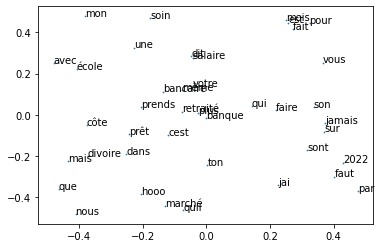

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df_new.Axe_1,df_new.Axe_2,s=0.5)
for i in range(df_new.shape[0]):
    plt.annotate(df_new.index[i],(df_new.Axe_1[i],df_new.Axe_2[i]))
plt.show()

## Les fonctions pour simplifié les codes sur les autres base

### Générale Fonction 

In [ ]:
def FacebookAnalysis(df):
    print("Le nombre totale de valeur manquante est :", df["text_pub"].isnull().sum())
    print("\n\n\n")
    # recuperons sous forma liste
    corpus = df["text_pub"].tolist()
    # passer en miniscul
    corpus=[element.lower() for element in corpus]
    # liste des ponctuations 
    import string
    ponc = list(string.punctuation)
    #print(ponc)
    # retrait des ponctuations 
    corpus=["".join([char for char in list(doc) if not (char in ponc)]) for doc in corpus]
    #cleaning function 
    df_clean = []
    for text in corpus:
        text = [nettoyeur(x) for x in text]
        df_clean.append(text)
    #final text, grouping all comments
    df_text = [''.join(text) for text in df_clean]
    final_text = " ".join(df_text)
    #final_text
    #stopwords define
    import nltk
    from nltk.corpus import stopwords
#nltk.download('stopwords')

#define of newstopwords
    newStopWords = ['efficacité👍','🐿',"👍","⛔ps","🙏🇨🇮","🇨🇮","🙄","😕","🐘","🤔","👍",'🙏','🇨🇮','🏡','⛔','…','j’ai','c’est','·','.','’','','»','Le',',','«','a','–','(',')','La']
    stopwords = set(stopwords.words('french') + newStopWords+list(STOPWORDS))
    #update of stopwords
    stopwords.update(['cest','mars','meme','cette','ça','autres','d’un','fevr','aout','cas','fait','ete','dec','mercredi','nov','oct','juil','plus','juin','mai','d’ivoire','sept','cote','a'])
  
    #Our buzz words 
    filter_word = [word for word in final_text.split() if word not in stopwords]
    counted_word = collections.Counter(filter_word)

    word_count = {}

    for letter, count in counted_word.most_common(10):
        word_count[letter]=count

    for i,j in word_count.items():
        print("Le mot: {0} est apparu {1} fois".format(i,j))
          #other visualization
    wordcloud_df = WordCloud(stopwords=stopwords,max_font_size=50,max_words=100).generate(final_text)

    plt.figure(figsize=(15,15))
    plt.imshow(wordcloud_df,interpolation='bilinear')
    plt.axis("off")
    plt.show()

Le nombre totale de valeur manquante est : 0




Le mot: jai est apparu 13 fois
Le mot: depuis est apparu 11 fois
Le mot: faire est apparu 11 fois
Le mot: bonjour est apparu 11 fois
Le mot: orange est apparu 10 fois
Le mot: tous est apparu 10 fois
Le mot: f est apparu 9 fois
Le mot: compte est apparu 8 fois
Le mot: si est apparu 8 fois
Le mot: sans est apparu 7 fois


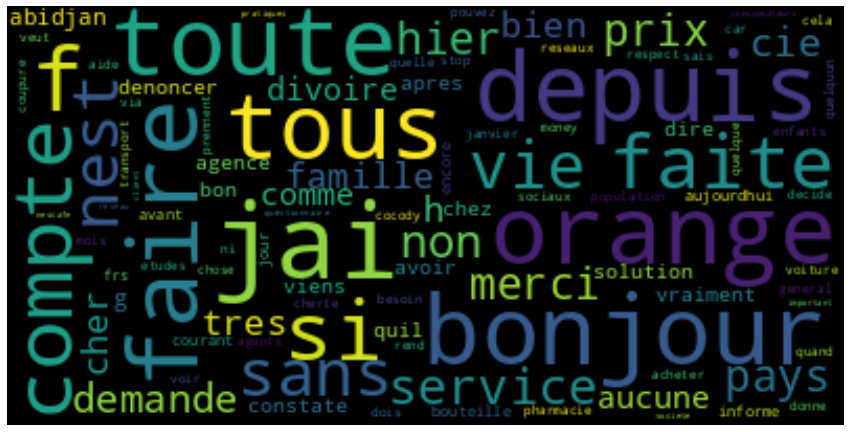

In [ ]:
FacebookAnalysis(df2)

In [ ]:
def TextAnalyse(df):
    """ Cette fonction permet de poursuivre le processus d'analyse des textes en faisant a la fin une representation des mots"""
    ## transformons les document en liste de liste par tokenisation
    # recuperons sous forma liste
    corpus = df["text_pub"].tolist()
    # passer en miniscul
    corpus=[element.lower() for element in corpus]
    # liste des ponctuations 
    import string
    ponc = list(string.punctuation)
    #print(ponc)
    # retrait des ponctuations 
    corpus=["".join([char for char in list(doc) if not (char in ponc)]) for doc in corpus]
    from nltk.tokenize import word_tokenize
    corpus_tk=[word_tokenize(doc) for doc in corpus]
    from nltk.stem import WordNetLemmatizer
    lem = WordNetLemmatizer()
    corpus_lem = [[lem.lemmatize(mot) for mot in doc] for doc in corpus_tk]
    from nltk.corpus import stopwords
    motsVides = stopwords.words('french')
    # suppression des stopWords
    corpus_sw = [[mot for mot in doc if not (mot in motsVides)] for doc in corpus_lem]
    corpus_sw = [[mot for mot in doc if not (mot in newStopWords)] for doc in corpus_lem]
    # retirons les tokens de moins de trois lettres
    corpus_sw = [[mot for mot in doc if len(mot) >=3]for doc in corpus_lem]
    # Nous pouvons aussi reformer les documents en chaine de charatere
    documents = [" ".join(doc) for doc in corpus_sw]
    print("\n",documents,"\n\n\n")
    #word2vec
    from gensim.models import Word2Vec
    model = Word2Vec(corpus_sw, vector_size=2,window=10)
    # recuperons les données dans un data frame
    df_new= pd.DataFrame(words.vectors,columns=["Axe_1","Axe_2"],index=words.key_to_index.keys())
    print(df_new.head(10))
    print("\n\n")
    import matplotlib.pyplot as plt
    plt.scatter(df_new.Axe_1,df_new.Axe_2,s=0.5)
    for i in range(df_new.shape[0]):
        plt.annotate(df_new.index[i],(df_new.Axe_1[i],df_new.Axe_2[i]))
    plt.show()


 ['selon votre expertise conseillezmoi une banque qui est réputée pour être sérieuse qui prends soin fonctionnaires', 'vie est devenue chère hooo vont suspendre construction infrastructure cause ton ventre hooo faut compter sur salaire seulement pour nourrir hooo faut créer petit projet pour arrondir revenus hooo faut investir dans petit champ hooo faut prendre prêt bancaire pour mettre dans… plus', 'prêt bancaire quel taux dintérêt fautil emprunter comment calculer mensualités très souvent après avoir contracter prêt bancaire crédit consommation entend certains plaindre banque volé ainsi avant mettre sou prêt est important connaître mécanisme par lequel banque vous facture le… plus', 'différence justifie fait que consommateur ivoirien est plus irrationnel monde dautres banques sont avec 1200f comme agio mais préfèrent sagglutiner dans banques françaises… plus', 'pour prêt banque dun montant 3800000 remboursable sur mois combien devraisje rembourser mon prêt mois lieu mois', 'lassuran

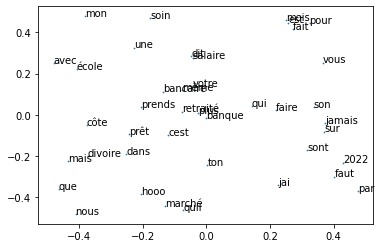

In [ ]:
TextAnalyse(df)

## Pour aller plus loin

<h2 align=center>  MODELISATION machine learning </h2>

<h2 align=center> Model LDA</h2>

Le modèle Latent Dirichlet Allocation (LDA) est un modèle probabiliste génératif qui permet de décrire des collections de documents de texte ou d’autres types de données discrètes. LDA fait partie d’une catégorie de modèles appelés “topic models”, qui cherchent à découvrir des structures thématiques cachées dans des vastes archives de documents.

Ceci permet d’obtenir des méthodes efficaces pour le traitement et l’organisation des documents de ces archives: organisation automatique des documents par sujet, recherche, compréhension et analyse du texte, ou même résumer des textes.

In [ ]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 1.3 MB/s eta 0:00:00m eta 0:00:010:00:01m
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn ... done


In [ ]:
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [ ]:
try:
    nltk.download('wordnet')
except LookupError:
    import nltk
    nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/cdata/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
lemm = WordNetLemmatizer()

class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

In [ ]:

text = documents

# Calling our overwritten Count vectorizer
tf_vectorizer = LemmaCountVectorizer(max_df=0.95,
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(text)


In [ ]:
lda = LatentDirichletAllocation(n_components=11, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)

In [ ]:
# entrainement
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=11, random_state=0)

In [ ]:
LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=11, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=11, random_state=0)

### Representation

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [ ]:
n_top_words = 10
print("\nTopics dans le model LDA: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics dans le model LDA: 
Topic #0:
vous pour dans sont plus est nous problème donc jamais
Topic #1:
pour 2022 plus faut côte divoire prêt mois est mardi
Topic #2:
soin prends ton plus même est dans qui veulent cest
Topic #3:
une plus dans école est pour sur marché dune maison
Topic #4:
tout comment quil sur avis selon que jusquà promotion leçon
Topic #5:
prêt bancaire crédit banque consommation par est plus confondre important
Topic #6:
que nous faire dit qui jai mon cest plus mais
Topic #7:
sur par concours plus fonctionnaire nous prêt grade comment nouveau
Topic #8:
plus banques dans mais sont comme consommateur est monde ivoirien
Topic #9:
son plus draps ditalie fait enfile boit chaussures sort chine
Topic #10:
est divoire mais qui côte dit une bien son plus



In [ ]:
first_topic = lda.components_[0]
second_topic = lda.components_[1]

In [ ]:
first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]

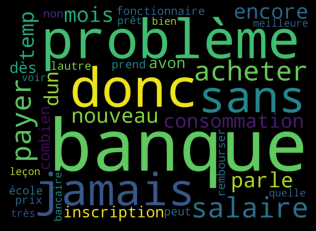

In [ ]:
firstcloud = WordCloud(stopwords=stopwords,
                       background_color='black',
                       width=2500,
                       height=1800
                       ).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off');

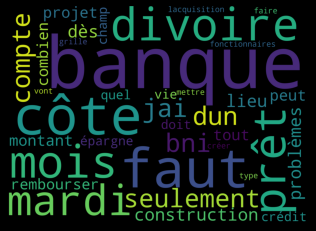

In [ ]:
second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]


second_cloud = WordCloud(
                          stopwords=stopwords,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(second_topic_words))
plt.imshow(second_cloud)
plt.axis('off');

#### pyLDAvis

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [ ]:
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

### Une fonction pour automatisé la modelisation sur les autres bases

In [ ]:
def Transforme(df):
    """ Cette fonction permet de poursuivre le processus d'analyse des textes en faisant a la fin une representation des mots"""
    ## transformons les document en liste de liste par tokenisation
    # recuperons sous forma liste
    corpus = df["text_pub"].tolist()
    # passer en miniscul
    corpus=[element.lower() for element in corpus]
    # liste des ponctuations 
    import string
    ponc = list(string.punctuation)
    #print(ponc)
    # retrait des ponctuations 
    corpus=["".join([char for char in list(doc) if not (char in ponc)]) for doc in corpus]
    from nltk.tokenize import word_tokenize
    corpus_tk=[word_tokenize(doc) for doc in corpus]
    from nltk.stem import WordNetLemmatizer
    lem = WordNetLemmatizer()
    corpus_lem = [[lem.lemmatize(mot) for mot in doc] for doc in corpus_tk]
    from nltk.corpus import stopwords
    motsVides = stopwords.words('french')
    # suppression des stopWords
    corpus_sw = [[mot for mot in doc if not (mot in motsVides)] for doc in corpus_lem]
    corpus_sw = [[mot for mot in doc if not (mot in newStopWords)] for doc in corpus_lem]
    # retirons les tokens de moins de trois lettres
    corpus_sw = [[mot for mot in doc if len(mot) >=3]for doc in corpus_lem]
    # Nous pouvons aussi reformer les documents en chaine de charatere
    documents = [" ".join(doc) for doc in corpus_sw]
    return documents

/home/cdata/Documents/M2/WebScraping/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [ ]:
def LDA(df,n_top_words = 10):
    from nltk.stem import WordNetLemmatizer
    from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
    from sklearn.decomposition import NMF, LatentDirichletAllocation
    lemm = WordNetLemmatizer()

    class LemmaCountVectorizer(CountVectorizer):
        def build_analyzer(self):
            analyzer = super(LemmaCountVectorizer, self).build_analyzer()
            return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))
        
    text = Transforme(df)

    # Calling our overwritten Count vectorizer
    tf_vectorizer = LemmaCountVectorizer(max_df=0.95,
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
    tf = tf_vectorizer.fit_transform(text)
    lda = LatentDirichletAllocation(n_components=11, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)
    lda.fit(tf)#entrainement
    
    LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=11, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)
    
    def print_top_words(model, feature_names, n_top_words):
        for topic_idx, topic in enumerate(model.components_):
            print("Topic #%d:" % topic_idx)
            print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()
    print("\nTopics dans le model LDA: ")
    tf_feature_names = tf_vectorizer.get_feature_names()
    print_top_words(lda, tf_feature_names, n_top_words)
    
    first_topic = lda.components_[0]
    second_topic = lda.components_[1]
    first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
    second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]
    firstcloud = WordCloud(stopwords=stopwords,
                       background_color='black',
                       width=2500,
                       height=1800
                       ).generate(" ".join(first_topic_words))
    plt.imshow(firstcloud)
    plt.axis('off');
    print("\n\n")
    second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]


    second_cloud = WordCloud(
                          stopwords=stopwords,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(second_topic_words))
    plt.imshow(second_cloud)
    plt.axis('off');


Topics dans le model LDA: 
Topic #0:
une plus mon pour jai tous suis orange mais compte
Topic #1:
plus bonjour pour nous qui cest sur tous faire dans
Topic #2:
que nous pour divoire côte plus consoinfo avec abidjan mais
Topic #3:
que bouteille dans nest voir service viens monsieur entre cocody
Topic #4:
info été vies avon bonsoir nous agent aucune obtention publication
Topic #5:
depuis courant coupure bon notre jai après toute momenton quil
Topic #6:
vous que pour plus est dans nous marché respect population
Topic #7:
une photo état cette été cherté est vie fait lycée
Topic #8:
est aucune sur plus pay stop cest merci que quand
Topic #9:
vous est faite que faire besoin vie vos non cette
Topic #10:
que est orange vous 100 cie plus compte somme dans






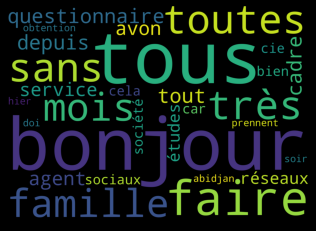

In [ ]:
LDA(df2)

### CONCLUSION

Au terme de ce projet nous avons apris plusieurs notions et techniques sur les methodes de web scraping et aussi bien nous avons approfondir les notions que nos enseignants nous ont enseignés durant le cour. Le challenge via ce projet était la partie text mining et surtout la modélisation Machine learning. Nous vous remerçions pour les compétences et les notions vues en cours.